# **Neural Network Regression Example**

## Data & Import

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Encoding and Train Test Split

In [6]:
df = pd.get_dummies(insurance, drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [7]:
X = df.drop("charges", axis=1)
y = df["charges"]

In [8]:
X.head(2), y.head(2)

(   age    bmi  children  sex_male  smoker_yes  region_northwest  \
 0   19  27.90         0         0           1                 0   
 1   18  33.77         1         1           0                 0   
 
    region_southeast  region_southwest  
 0                 0                 1  
 1                 1                 0  ,
 0    16884.9240
 1     1725.5523
 Name: charges, dtype: float64)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## TF Model

In [10]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

insurance_model.fit(X_train, y_train, epochs= 100)

Epoch 1/100
34/34 [==============================] - 0s 937us/step - loss: 9392.2158 - mae: 9392.2158
Epoch 2/100
34/34 [==============================] - 0s 990us/step - loss: 7879.6206 - mae: 7879.6206
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7571.6909 - mae: 7571.6909
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7752.6172 - mae: 7752.6172
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7648.2529 - mae: 7648.2529
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7662.7227 - mae: 7662.7227
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7599.6987 - mae: 7599.6987
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7747.4717 - mae: 7747.4717
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.3716 - mae: 7496.3716
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7682.4839 - mae: 7682.

In [11]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 890us/step - loss: 7942.6743 - mae: 7942.6743


[7942.67431640625, 7942.67431640625]

## Improve Model

In [12]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

history = insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13261.9111 - mae: 13261.9111
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13091.2227 - mae: 13091.2227
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12738.7461 - mae: 12738.7461
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12067.9990 - mae: 12067.9990
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10972.9570 - mae: 10972.9570
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9574.4766 - mae: 9574.4766
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8255.6494 - mae: 8255.6494
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7559.4067 - mae: 7559.4067
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.4717 - mae: 7429.4717
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7410.5020 - mae:

In [13]:
history

Text(0.5, 0, 'epochs')

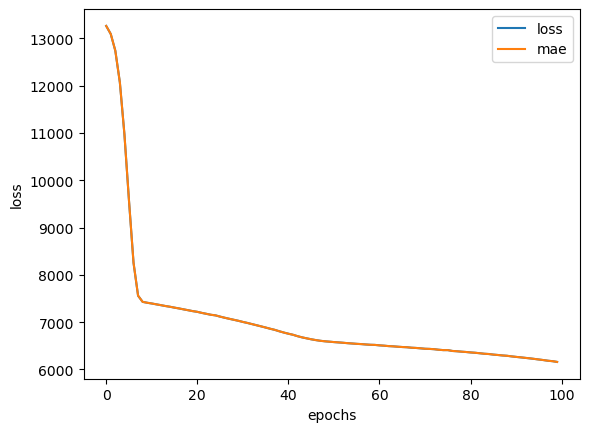

In [14]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [15]:
history_2 = insurance_model_2.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 6147.0161 - mae: 6147.0161
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 6131.5317 - mae: 6131.5317
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 6118.8145 - mae: 6118.8145
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 6102.3950 - mae: 6102.3950
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 6088.1562 - mae: 6088.1562
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 6072.1899 - mae: 6072.1899
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 6054.0205 - mae: 6054.0205
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 6039.7559 - mae: 6039.7559
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 6021.5742 - mae: 6021.5742
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 6002.0239 - mae: 6002.0239

In [16]:
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 998us/step - loss: 3196.6509 - mae: 3196.6509


(3196.65087890625, 3196.65087890625)

Text(0.5, 0, 'epochs')

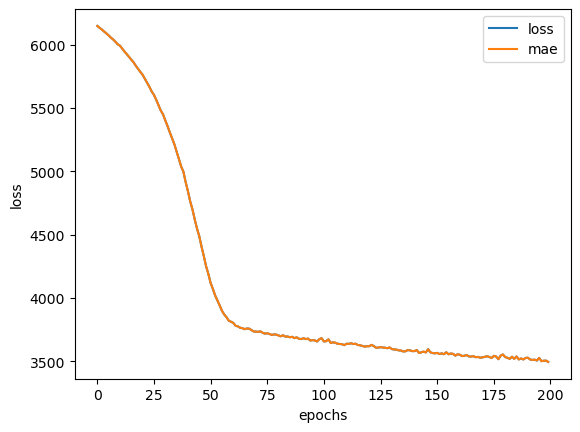

In [17]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")